O Ministério da Saúde desenvolveu o Sistema de Informações sobre Nascidos Vivos(SINASC), com o qual reúne dados epidemiológicos de todos os nascidos do país.

O seguinte artigo tem como objetivo traçar alguns perfis e investigar possíveis relações entre eles.

Observação: Este documento tem por finalidade desenvolver minhas habilidades relacionadas à análise de dados, estatística e Python. Atividade do grupo de estudos da Universidade dos Dados.

Primeiro preciso tratar os dados brutos. Para tanto, utilizarei a linguagem R por achar mais intuitiva para esse tipo de questão. Além disso, diminuir a rixa R e Python, mostrando complementariedade entre as duas.

Para rodar o R no Jupyter Notebook, o seguinte comando deve ser utilizado:

In [6]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Em seguida, as celulas que serão escritas em R devem começar com um ``%%R``. Abaixo instalo o pacote ``dplyr`` para tratamento de dados.

In [12]:
%%R

install.packages("dplyr")

R[write to console]: Warning in install.packages("dplyr") :
R[write to console]: 
 
R[write to console]:  'lib = "C:/Program Files/R/R-4.2.0/library"' is not writable



Would you like to use a personal library instead? (yes/No/cancel) yes
Would you like to create a personal library
'C:\Users\Usuario\AppData\Local/R/win-library/4.2'
to install packages into? (yes/No/cancel) yes
--- Please select a CRAN mirror for use in this session ---


R[write to console]: also installing the dependencies 'ellipsis', 'fansi', 'pkgconfig', 'purrr', 'cli', 'crayon', 'utf8', 'generics', 'glue', 'lifecycle', 'magrittr', 'R6', 'rlang', 'tibble', 'tidyselect', 'vctrs', 'pillar'


R[write to console]: trying URL 'https://vps.fmvz.usp.br/CRAN/bin/windows/contrib/4.2/ellipsis_0.3.2.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 40304 bytes (39 KB)

R[write to console]: downloaded 39 KB


R[write to console]: trying URL 'https://vps.fmvz.usp.br/CRAN/bin/windows/contrib/4.2/fansi_1.0.3.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 310087 bytes (302 KB)

R[write to console]: downloaded 302 KB


R[write to console]: trying URL 'https://vps.fmvz.usp.br/CRAN/bin/windows/contrib/4.2/pkgconfig_2.0.3.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 22409 bytes (21 KB)

R[write to console]: downloaded 21 KB


R[write to console]: tryin

package 'ellipsis' successfully unpacked and MD5 sums checked
package 'fansi' successfully unpacked and MD5 sums checked
package 'pkgconfig' successfully unpacked and MD5 sums checked
package 'purrr' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'crayon' successfully unpacked and MD5 sums checked
package 'utf8' successfully unpacked and MD5 sums checked
package 'generics' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked
package 'lifecycle' successfully unpacked and MD5 sums checked
package 'magrittr' successfully unpacked and MD5 sums checked
package 'R6' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked
package 'pillar' successfully unpacked 

Por fim, seleciono as variáveis que utilizarei nessa análise, transformo as categoricas numéricas em categoricas conforme suas correspondências e salvo a base de dados para lê-la no Python.

In [39]:
%%R

df = read.csv("nascidosRJTratada.csv")

In [53]:
%%R
require(dplyr)

df = read.csv("nascidosRJ.csv")

df = select(df, IDADEMAE, ESTCIVMAE, ESCMAE, PARIDADE, TPROBSON, SEXO, PESO, RACACOR, GRAVIDEZ, SEMAGESTAC, CONSULTAS,KOTELCHUCK, TPAPRESENT, PARTO)

df$ESTCIVMAE = factor(df$ESTCIVMAE, levels = c(1,2,3,4,5),
                              labels = c("Solteira", "Casada", "Viuva", 
                                         "Separado judicialmente/Divorciado", 
                                         "Uniao consensual"))

df$ESCMAE = factor(df$ESCMAE, levels = c(1,2,3,4,5), 
                          labels = c("Nenhuma", "1 a 3 ano", "4 a 7 anos",
                                     "8 a 11 anos", "12 e mais"))

df$PARIDADE = factor(df$PARIDADE, levels = c(0,1), 
                            labels = c("Sim", "Nao"))

df$SEXO = factor(df$SEXO, levels = c(1,2), 
                        labels = c("Masculino", "Feminino"))

df$RACACOR = factor(df$RACACOR, levels = c(1,2,3,4,5), 
                           labels = c("Branca", "Preta", "Amarela", "Parda", "Indigena"))

df$GRAVIDEZ = factor(df$GRAVIDEZ, levels = c(1,2,3),
                            labels = c("Unica", "Dupla", "Tripla ou mais"))

df$CONSULTAS = factor(df$CONSULTAS, levels = c(1,2,3,4), 
                             labels = c("Nenhuma", "de 1 a 3", "de 4 a 6", 
                                        "7 e mais"))

df$PARTO = factor(df$PARTO, levels = c(1,2), 
                         labels = c("Vaginal", "Cesareo"))

df$KOTELCHUCK = factor(df$KOTELCHUCK, levels = c(1,2,3,4,5), 
                              labels = c("Nao fez pre-natal", "Inadequado", 
                                         "Intermediario", "Adequado", 
                                         "Mais que adequado"))

df$TPROBSON = factor(df$TPROBSON, levels = c(1,2,3,4,5,6,7,8,9,10),
                            labels = c("Grupo 1","Grupo 2","Grupo 3","Grupo 4","Grupo 5",
                                       "Grupo 6","Grupo 7","Grupo8","Grupo 9","Grupo 10"))

write.csv(df, "nascidosRJTratada.csv")

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [55]:
df = pd.read_csv("nascidosRJTratada.csv")
df.head()

,Unnamed: 0,IDADEMAE,ESTCIVMAE,ESCMAE,PARIDADE,TPROBSON,SEXO,PESO,RACACOR,GRAVIDEZ,SEMAGESTAC,CONSULTAS,KOTELCHUCK,TPAPRESENT,PARTO
0,1,26,Solteira,4 a 7 anos,Nao,Grupo 3,Feminino,3790.0,Parda,Unica,41.0,7 e mais,Mais que adequado,1.0,Vaginal
1,2,29,Uniao consensual,8 a 11 anos,Sim,Grupo 10,Masculino,3020.0,Parda,Unica,36.0,7 e mais,Mais que adequado,1.0,Vaginal
2,3,27,Uniao consensual,4 a 7 anos,Nao,Grupo 7,Feminino,2445.0,Parda,Unica,38.0,7 e mais,Mais que adequado,2.0,Vaginal
3,4,18,Uniao consensual,8 a 11 anos,Sim,Grupo 2,Feminino,3760.0,Parda,Unica,40.0,7 e mais,Mais que adequado,1.0,Cesareo
4,5,30,Casada,8 a 11 anos,Sim,Grupo 2,Feminino,2880.0,Parda,Unica,39.0,7 e mais,Mais que adequado,1.0,Cesareo


Os seguintes perfis serão traçados:

1. as mães com idades entre 18 e 40 anos, no que se refere a características pessoais, sociais e de riscos em relação ao parto;

2. as gestações no que concerne ao tipo de gestação, a duração da gestação e a quantidade de consultas pré-natal efetuadas;

3. dos partos em relação a modalidade do parto e a posição do feto;

4. dos bebês em relação ao sexo, cor e peso a nascer.

## as mães com idades entre 18 e 40 anos, no que se refere a características pessoais, sociais e de riscos em relação ao parto

In [40]:
aux = df[(df['IDADEMAE'] >= 18) & (df['IDADEMAE'] <= 40)]

Veja que tanto a média quanto a mediana foram de 27 anos, indicando que a distribuição das idades pode ser simetrica. Observemos o histograma das idades para confirmar:

In [41]:
aux['IDADEMAE'].describe()

count    189951.000000
mean         27.689167
std           6.002740
min          18.000000
25%          23.000000
50%          27.000000
75%          32.000000
max          40.000000
Name: IDADEMAE, dtype: float64

Veja na figura abaixo que a distribuição das idades não é simétria. Na verdade ela é assimétrica à direita.

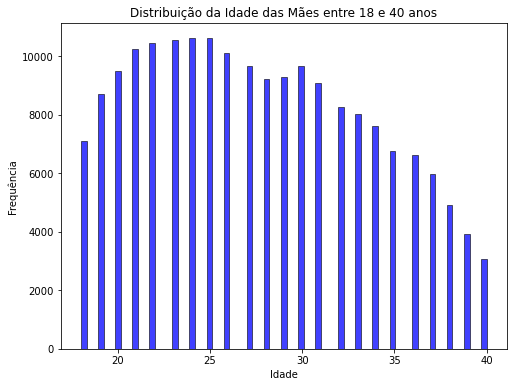

In [42]:
plt.figure(figsize = (8, 6))

sns.histplot(data = aux, x = "IDADEMAE", color="blue", palette="bright")
plt.title('Distribuição da Idade das Mães entre 18 e 40 anos')
plt.ylabel('Frequência')
plt.xlabel("Idade")
plt.show()

Na tabela e no gráfico abaixo pode-se ver que 62,46% das mães são solteiras, ao passo que apenas cerca de 36% são casadas ou vivem em união consensual.

Solteira                             62.459362
Casada                               32.647109
Uniao consensual                      3.173526
Separado judicialmente/Divorciado     1.571744
Viuva                                 0.148259
Name: ESTCIVMAE, dtype: float64


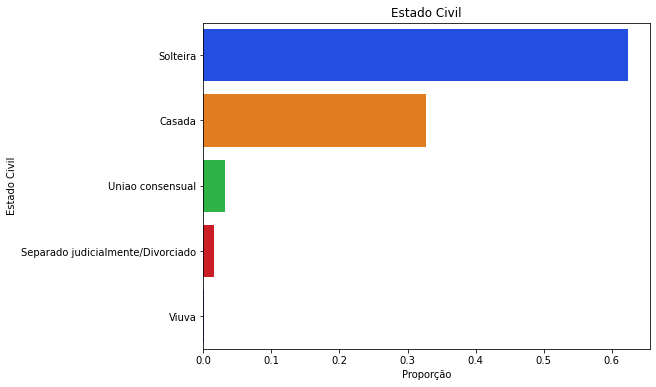

In [43]:
print(df["ESTCIVMAE"].value_counts(normalize=True)*100)

plt.figure(figsize = (8, 6))

d = {"Estado Civil": df["ESTCIVMAE"].value_counts(normalize=True).index,
     "Proporção": df["ESTCIVMAE"].value_counts(normalize=True).values}

aux_2 = pd.DataFrame(data = d)

bar = sns.barplot(data = aux_2, y = "Estado Civil", x = "Proporção", palette = "bright", orient = "h")

plt.title('Estado Civil')
plt.show()

Outra questão refere-se aos anos de estudo, onde podemos observar na tabela abaixo que 61,38% das mães possuem escolaridade entre 8 e 11 anos e somente 1,37% possuem até 3 anos de estudo.

In [44]:
print("Escolaridade da Mãe (%): ")
for i in range(0, len(df["ESCMAE"].value_counts(normalize=True).index)):
    
    index = df["ESCMAE"].value_counts(normalize=True).index[i]
    value = round(df["ESCMAE"].value_counts(normalize=True).values[i], 4)*100
    
    print(f'{index}: \t {value}')

Escolaridade da Mãe: 
8 a 11 anos: 	 61.38
12 e mais: 	 21.38
4 a 7 anos: 	 15.870000000000001
1 a 3 ano: 	 1.25
Nenhuma: 	 0.12


Por fim, foi levado em conta a classificação de Robson. Segundo o Portal de Boas Práticas em Saúde da Mulher, da Criança e do Adolescente da FioCruz, a classificação de Robson foi criada pelo médico irlandês Michael Robson em 2001 com o objetivo de identificar prospectivamente grupos de mulheres clinicamente relevantes, nos quais haja diferenças nas taxas de cesárea e dessa forma permitindo comparações em uma mesma instituição ao longo do tempo ou entre diferentes instituições.

A classificação separa os partos em 10 grupos, que podem ser consultados na imagem abaixo:

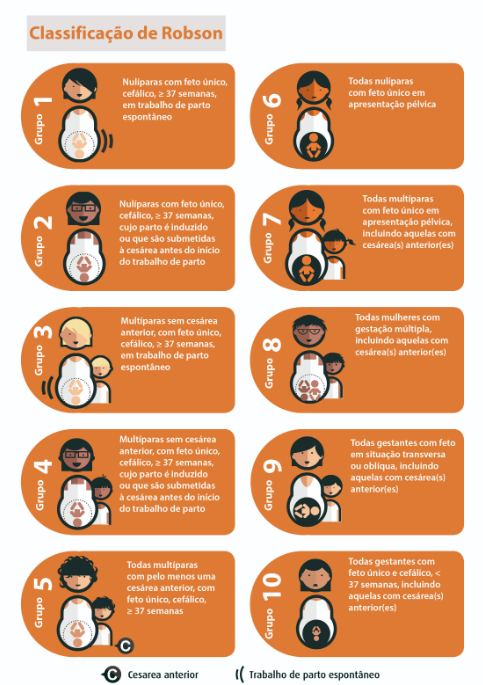

fonte: https://portaldeboaspraticas.iff.fiocruz.br/apice/classificacao-de-robson-e-tema-do-apiceon/

A maior proporção de partos pertencem ao Grupo 5, 25,03%. Ou seja, já deram a luz anteriormente, por cesária, e o feto estava em posição cefálica e no tempo ideal da gestação. Além disso, somando os Grupos 2 e 4, 23,79% precisaram ter o parto induzido ou foram submetidas à cesária antes do início do trabalho de parto.

Grupo 5     25.028967
Grupo 3     18.643901
Grupo 1     18.375186
Grupo 2     14.609229
Grupo 4      9.186607
Grupo 10     8.946982
Grupo8       2.293693
Grupo 7      1.573833
Grupo 6      1.151777
Grupo 9      0.189826
Name: TPROBSON, dtype: float64


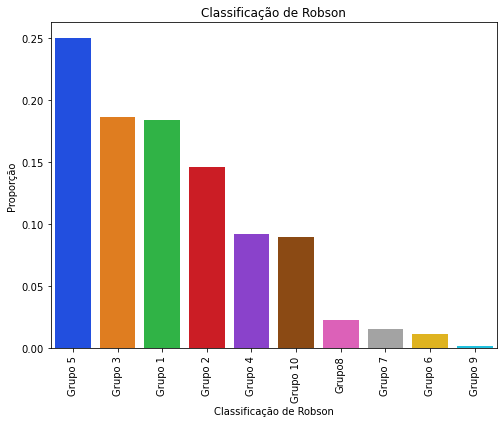

In [45]:
print(df["TPROBSON"].value_counts(normalize=True)*100)

plt.figure(figsize = (8, 6))

d = {"Classificação de Robson": df["TPROBSON"].value_counts(normalize=True).index,
     "Proporção": df["TPROBSON"].value_counts(normalize=True).values}

aux_2 = pd.DataFrame(data = d)

bar = sns.barplot(data = aux_2, x = "Classificação de Robson", y = "Proporção", palette = "bright")

plt.xticks(rotation='vertical')
plt.title('Classificação de Robson')
plt.show()

## as gestações no que concerne ao tipo de gestação e a quantidade de consultas pré-natal efetuadas

No gráfico abaixo fica evidente que a extrema maioria das gestações foram únicas, cerca de 98%. Na base de 131926 gestações registradas no ano de 2019, somente 100 foram triplas ou mais

Unica             97.713769
Dupla              2.238120
Tripla ou mais     0.048111
Name: GRAVIDEZ, dtype: float64


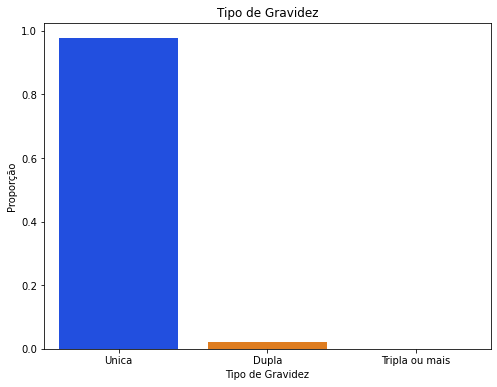

In [46]:
print(df["GRAVIDEZ"].value_counts(normalize=True)*100)

plt.figure(figsize = (8, 6))

d = {"Tipo de Gravidez": df["GRAVIDEZ"].value_counts(normalize=True).index,
     "Proporção": df["GRAVIDEZ"].value_counts(normalize=True).values}

aux_2 = pd.DataFrame(data = d)

bar = sns.barplot(data = aux_2, x = "Tipo de Gravidez", y = "Proporção", palette = "bright")

plt.title('Tipo de Gravidez')
plt.show()

Já com relação a quantidade de consultas pré-natal, 73,86% tiveram mais de 7 consultas. Também podemos observar que uma proporção muito pequena de mulheres, cerca de 1%, não tiveram nenhuma consulta pré-natal e apesar disso seus filhos nasceram vivos.

7 e mais    73.864062
de 4 a 6    19.153080
de 1 a 3     5.137218
Nenhuma      1.845640
Name: CONSULTAS, dtype: float64


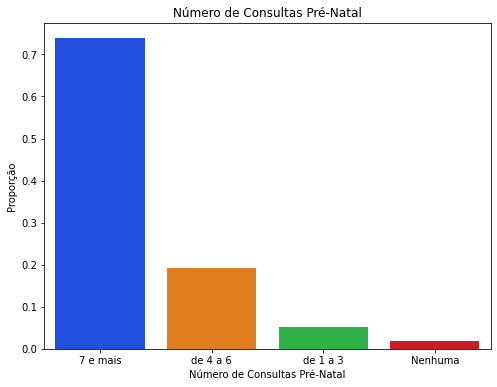

In [48]:
print(df["CONSULTAS"].value_counts(normalize=True)*100)

plt.figure(figsize = (8, 6))

d = {"Número de Consultas": df["CONSULTAS"].value_counts(normalize=True).index,
     "Proporção": df["CONSULTAS"].value_counts(normalize=True).values}

aux_2 = pd.DataFrame(data = d)

bar = sns.barplot(data = aux_2, x = "Número de Consultas", y = "Proporção", palette = "bright")

plt.title('Número de Consultas Pré-Natal')
plt.xlabel('Número de Consultas Pré-Natal')
plt.show()

## dos partos em relação a modalidade do parto e a posição do feto

Na tabela abaixo pode-se ver que cerca de 58% dos partos foram cesarea.

In [49]:
print("Modalidade do Parto (%): ")
for i in range(0, len(df["PARTO"].value_counts(normalize=True).index)):
    
    index = df["PARTO"].value_counts(normalize=True).index[i]
    value = round(df["PARTO"].value_counts(normalize=True).values[i], 2)*100
    
    print(f'{index}: \t {value}')

Modalidade do Parto: 
Cesareo: 	 57.99999999999999
Vaginal: 	 42.0


Além disso, a maior parte dos fetos estava em posição cefálica na hora do parto, cerca de 95%. E somente 0,26% estavam en posição transversa.

In [57]:
df["TPAPRESENT"] = df["TPAPRESENT"].astype(str).replace("1", "Cefálica").replace("2", "Pelvica").replace("3", "Transversa").replace("9", "Não Informado")

print("Posição do Feto (%): ")
for i in range(0, len(df["TPAPRESENT"].value_counts(normalize=True).index)):
    
    index = df["TPAPRESENT"].value_counts(normalize=True).index[i]
    value = df["TPAPRESENT"].value_counts(normalize=True).values[i]*100
    
    print(f'{index}: \t {value}')

Posição do Feto (%): 
1.0: 	 95.047334234022
2.0: 	 3.1443970594598754
9.0: 	 1.4087283462106168
nan: 	 0.214434417204756
3.0: 	 0.18510594310276024


## dos bebês em relação ao sexo, cor e peso a nascer

A proporção do sexo entre os nascidos foi bem semelhante, mas com uma porcentagem maior do sexo masculino.

In [58]:
print("Sexo do Bebê (%): ")
for i in range(0, len(df["SEXO"].value_counts(normalize=True).index)):
    
    index = df["SEXO"].value_counts(normalize=True).index[i]
    value = df["SEXO"].value_counts(normalize=True).values[i]*100
    
    print(f'{index}: \t {value}')

Sexo do Bebê (%): 
Masculino: 	 51.00100509279074
Feminino: 	 48.99899490720926


Além disso, 65,64% dos nascidos em 2019 no Rio de Janeiro foram declarados pardos ou pretos e cerca de 34% foram declarados brancos.

Parda       52.255397
Branca      33.988835
Preta       13.394044
Amarela      0.286446
Indigena     0.075278
Name: RACACOR, dtype: float64


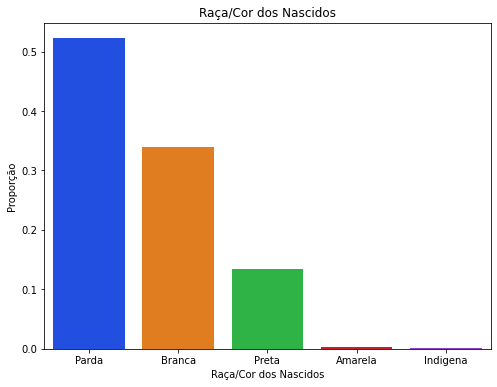

In [59]:
print(df["RACACOR"].value_counts(normalize=True)*100)

plt.figure(figsize = (8, 6))

d = {"Raça/Cor": df["RACACOR"].value_counts(normalize=True).index,
     "Proporção": df["RACACOR"].value_counts(normalize=True).values}

aux_2 = pd.DataFrame(data = d)

bar = sns.barplot(data = aux_2, x = "Raça/Cor", y = "Proporção", palette = "bright")

plt.title('Raça/Cor dos Nascidos')
plt.xlabel('Raça/Cor dos Nascidos')
plt.show()

Por fim, podemos ver que o histograma do peso dos recém-nascidos é bem distribuido ao redor da média, apontando para uma distribuição Normal. Para verificar tal hipótese, realizaremos o teste de Kolmogorov-Smirnov.

count    207984.000000
mean       3169.207516
std         574.538164
min         100.000000
25%        2885.000000
50%        3205.000000
75%        3520.000000
max        7000.000000
Name: PESO, dtype: float64


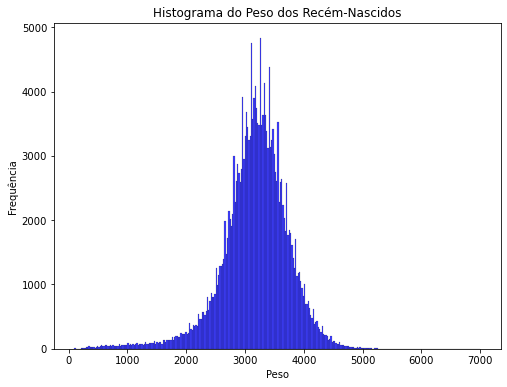

In [83]:
print(df["PESO"].describe())

plt.figure(figsize = (8, 6))

sns.histplot(data = df, x = "PESO", color="blue", palette="bright")
plt.title('Histograma do Peso dos Recém-Nascidos')
plt.ylabel('Frequência')
plt.xlabel("Peso")
plt.show()

In [70]:
import numpy as np
import scipy.stats as ss
import statsmodels.api as sm

Apesar do histograma ser muito similar à distribuição Normal, tanto o teste de Kolmogorov-Smirnov quanto o qqplot indicam que os dados não são provenientes de uma distribuição Normal.

Teste de Kolmogorov-Smirnov:

Hipótese Nula: Os dados são provenientes de uma distribuição Normal

X

Hipótese Alternativa: Os dados não são provenientes de uma distribuição Normal

In [79]:
pesos = df['PESO'].dropna()/1000 #transformando os pesos para quilos.

ss.kstest(pesos, "norm", N = len(pesos), args=[np.mean(pesos),np.std(pesos)])

KstestResult(statistic=0.06343039679498003, pvalue=0.0)

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


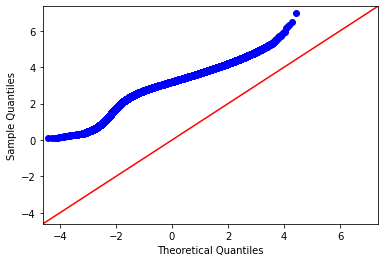

In [80]:
fig = sm.qqplot(pesos, line='45')
plt.show()

Agora, desejo avaliar as seguintes hipóteses:

1. se a duração da média da gestação foi independente da modalidade de parto;
2. se houve associação entre o tipo de gestação (única ou gemelar) e a modalidade de parto;
3. se a proporção de partos cesáreos foi igual para mães na faixa etária de 18 a 20 anos, 21 a 34 anos e
35 a 40 anos;
4. se o peso ao nascer foi, em média, igual entre bebês da cor negra, branca ou de outra cor.

## se a duração da média da gestação foi independente da modalidade de parto

O linguagem R é uma linguagem estatística por excelência, então para realizar os testes de hipóteses eu também à utilizarei. 

In [85]:
%%R

install.packages("DescTools")
install.packages("stats")

require(DescTools)
require(stats)

R[write to console]: Installing package into 'C:/Users/Usuario/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



--- Please select a CRAN mirror for use in this session ---


R[write to console]: also installing the dependencies 'sys', 'proxy', 'rematch', 'hms', 'prettyunits', 'askpass', 'rootSolve', 'e1071', 'lmom', 'cellranger', 'cpp11', 'progress', 'curl', 'jsonlite', 'mime', 'openssl', 'mvtnorm', 'expm', 'Rcpp', 'rstudioapi', 'Exact', 'gld', 'data.table', 'readxl', 'httr', 'BH'


R[write to console]: trying URL 'https://vps.fmvz.usp.br/CRAN/bin/windows/contrib/4.2/sys_3.4.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 46309 bytes (45 KB)

R[write to console]: downloaded 45 KB


R[write to console]: trying URL 'https://vps.fmvz.usp.br/CRAN/bin/windows/contrib/4.2/proxy_0.4-26.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 220727 bytes (215 KB)

R[write to console]: downloaded 215 KB


R[write to console]: trying URL 'https://vps.fmvz.usp.br/CRAN/bin/windows/contrib/4.2/rematch_1.0.1.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 16221 b

package 'sys' successfully unpacked and MD5 sums checked
package 'proxy' successfully unpacked and MD5 sums checked
package 'rematch' successfully unpacked and MD5 sums checked
package 'hms' successfully unpacked and MD5 sums checked
package 'prettyunits' successfully unpacked and MD5 sums checked
package 'askpass' successfully unpacked and MD5 sums checked
package 'rootSolve' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'lmom' successfully unpacked and MD5 sums checked
package 'cellranger' successfully unpacked and MD5 sums checked
package 'cpp11' successfully unpacked and MD5 sums checked
package 'progress' successfully unpacked and MD5 sums checked
package 'curl' successfully unpacked and MD5 sums checked
package 'jsonlite' successfully unpacked and MD5 sums checked
package 'mime' successfully unpacked and MD5 sums checked
package 'openssl' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpac

R[write to console]: Warning:
R[write to console]:  package 'stats' is in use and will not be installed

R[write to console]: Carregando pacotes exigidos: DescTools



Para avaliar se a duração da média da gestação foi independente da modalidade de parto, primeiro devo avaliar se as são iguais através do teste F

Veja que o p-valor para o teste da Variância foi muito pequeno, então há evidências para dizer que as variâncias não são iguais.

In [86]:
%%R 

VarTest(df$SEMAGESTAC ~ df$PARTO)


	F test to compare two variances

data:  df$SEMAGESTAC by df$PARTO
F = 1.0631, num df = 87189, denom df = 118377, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.050079 1.076382
sample estimates:
ratio of variances 
          1.063143 



Desse modo, realizamos o teste T para quando as variâncias não são iguais.

O p-valor deste teste também foi muito baixo, então há evidências para dizer que a duração média da gestação não independe
da modalidade do parto.

In [87]:
%%R

t.test(df$SEMAGESTAC ~ df$PARTO, alternative = c("two.sided"), mu = 0, var.equal = F)


	Welch Two Sample t-test

data:  df$SEMAGESTAC by df$PARTO
t = 37.155, df = 184590, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Vaginal and group Cesareo is not equal to 0
95 percent confidence interval:
 0.3409003 0.3788690
sample estimates:
mean in group Vaginal mean in group Cesareo 
             38.62304              38.26316 



## se houve associação entre o tipo de gestação (única ou gemelar) e a modalidade de parto

Para avaliar esse tipo de associação, utilizei o teste Chi-Quadrado, sob a hipótese nula de que o tipo de gestação e a modalidade de parto são indepentes. Pode-se ver abaixo que o p-valor foi muito baixo, indicando que tipo de gestação e modalidade de parto não são independentes.

In [89]:
%%R

df$GRAVIDEZ2 = ifelse(df$GRAVIDEZ == "Única", "Unica", "Gemelar")

chisq.test(table(df$GRAVIDEZ2, df$PARTO))


	Chi-squared test for given probabilities

data:  table(df$GRAVIDEZ2, df$PARTO)
X-squared = 4964.5, df = 1, p-value < 2.2e-16



## se a proporção de partos cesáreos foi igual para mães na faixa etária de 18 a 20 anos, 21 a 34 anos e 35 a 40 anos

Para essa investigação, também foi usado o teste Qui-Quadrado de aderência. O p-valor encontrado foi muito baixo. Portanto, há evidências para dizer que a proporção de partos cesáreos foi diferente para pelos menos uma das faixas etárias.

In [91]:
%%R 

df$IDADEMAECAT = cut(df$IDADEMAE, breaks = c(17,20,34,40), 
                        labels = c("[18,20]", "[21,34]", "[35,40]"))

y = table(df$PARTO, df$IDADEMAECAT)
y[c(2,4,6)]
chisq.test(y[c(2,4,6)])


	Chi-squared test for given probabilities

data:  y[c(2, 4, 6)]
X-squared = 71716, df = 2, p-value < 2.2e-16



## se o peso ao nascer foi, em média, igual entre bebês da cor negra, branca ou de outra cor

Por fim, foi utilizado o teste ANOVA para comparação de médias. Para tanto, foi obtido p-valor de 0,01459.
Logo, pode-se dizer que o peso médio ao nascer é diferentes para pelos menos uma das raças observadas.

In [95]:
%%R 

df$RACACOR2 = ifelse(df$RACACOR == "Branca", "Branca", 
                        ifelse(df$RACACOR == "Preta", "Negra", "Outra Cor"))

oneway.test(df$PESO ~ df$RACACOR2, var.equal = T)


	One-way analysis of means

data:  df$PESO and df$RACACOR2
F = 52.479, num df = 2, denom df = 204570, p-value < 2.2e-16



A partir disso, foi realizado o teste de Bonferroni e observado que as médias de peso são diferentes entre as crianças declaradas de "Outra Cor"/"Branca".

In [96]:
%%R 

x = aov(PESO ~ RACACOR2, data = df)

PostHocTest(x, method = "bonferroni")
# plot(TukeyHSD(x), las=2)


  Posthoc multiple comparisons of means : Bonferroni 
    95% family-wise confidence level

$RACACOR2
                       diff     lwr.ci    upr.ci   pval    
Negra-Branca     -35.029319 -44.835913 -25.22273 <2e-16 ***
Outra Cor-Branca   4.445067  -2.243962  11.13410 0.3349    
Outra Cor-Negra   39.474386  30.171399  48.77737 <2e-16 ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

